Contour 0:
  Aspect Ratio = 1.429
  Extent = 0.997
  Solidity = 1.000
  Equivalent Diameter = 662.47
  Orientation: Not enough points to fit ellipse
  Pixel points count = 345876
  Min/Max intensity = (0.0, 255.0) at (113, 63), (0, 0)
  Mean color/intensity = (222.30934496756063, 222.30934496756063, 222.30934496756063, 0.0)
------------------------------------------------------------
Contour 1:
  Aspect Ratio = 0.847
  Extent = 0.711
  Solidity = 0.950
  Equivalent Diameter = 160.26
  Orientation = 0.11°, Major Axis = 153.30, Minor Axis = 175.82
  Pixel points count = 20424
  Min/Max intensity = (0.0, 255.0) at (499, 243), (499, 242)
  Mean color/intensity = (6.292596944770858, 6.292596944770858, 6.292596944770858, 0.0)
------------------------------------------------------------
Contour 2:
  Aspect Ratio = 0.879
  Extent = 0.484
  Solidity = 0.716
  Equivalent Diameter = 231.89
  Orientation = 28.26°, Major Axis = 213.91, Minor Axis = 324.12
  Pixel points count = 42831
  Min/Max inte

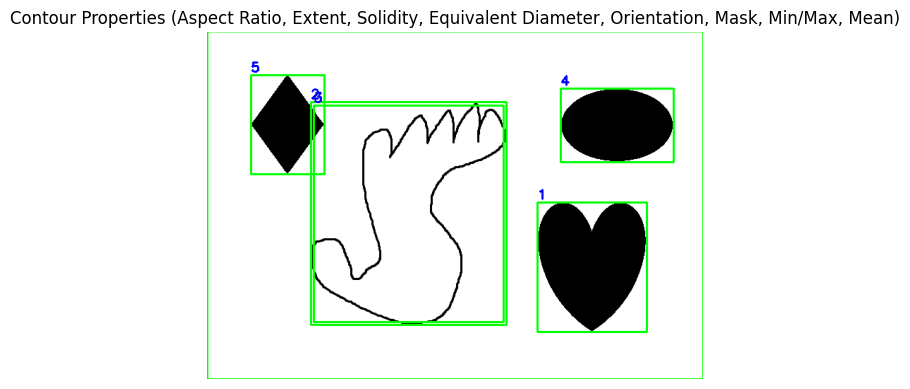

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# ======================
# Đọc ảnh và chuẩn bị
# ======================
im = cv.imread(r"D:\Documents\workspace\ThiGiacMayTinh\ComputerVision2025\img\1.png")
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Nhị phân hóa và tìm contours
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

im_draw = im.copy()

# ======================
# Phân tích tất cả contours
# ======================
for i, cnt in enumerate(contours):
    # ----- 1. Aspect Ratio -----
    x, y, w, h = cv.boundingRect(cnt)
    aspect_ratio = float(w) / h if h != 0 else 0

    # ----- 2. Extent -----
    area = cv.contourArea(cnt)
    rect_area = w * h
    extent = float(area) / rect_area if rect_area > 0 else 0

    # ----- 3. Solidity -----
    hull = cv.convexHull(cnt)
    hull_area = cv.contourArea(hull)
    solidity = float(area) / hull_area if hull_area > 0 else 0

    # ----- 4. Equivalent Diameter -----
    equi_diameter = np.sqrt(4 * area / np.pi)

    # ----- 5. Orientation -----
    orientation = None
    major_axis = None
    minor_axis = None
    if cnt.shape[0] >= 5:  # fitEllipse yêu cầu >=5 điểm
        (cx, cy), (MA, ma), angle = cv.fitEllipse(cnt)
        orientation = angle
        major_axis = MA
        minor_axis = ma

    # ----- 6. Mask & Pixel Points -----
    mask = np.zeros(imgray.shape, np.uint8)
    cv.drawContours(mask, [cnt], 0, 255, -1)
    pixelpoints = np.transpose(np.nonzero(mask))

    # ----- 7. Min/Max Value & Locations -----
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(imgray, mask=mask)

    # ----- 8. Mean Color / Intensity -----
    mean_val = cv.mean(im, mask=mask)

    # ----- Vẽ bounding box & số thứ tự contour -----
    cv.rectangle(im_draw, (x, y), (x+w, y+h), (0,255,0), 2)
    cv.putText(im_draw, str(i), (x, y-5), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    # ----- In kết quả -----
    print(f"Contour {i}:")
    print(f"  Aspect Ratio = {aspect_ratio:.3f}")
    print(f"  Extent = {extent:.3f}")
    print(f"  Solidity = {solidity:.3f}")
    print(f"  Equivalent Diameter = {equi_diameter:.2f}")
    if orientation is not None:
        print(f"  Orientation = {orientation:.2f}°, Major Axis = {major_axis:.2f}, Minor Axis = {minor_axis:.2f}")
    else:
        print("  Orientation: Not enough points to fit ellipse")
    print(f"  Pixel points count = {len(pixelpoints)}")
    print(f"  Min/Max intensity = ({min_val}, {max_val}) at {min_loc}, {max_loc}")
    print(f"  Mean color/intensity = {mean_val}")
    print("-"*60)

# ======================
# Hiển thị ảnh kết quả
# ======================
plt.imshow(cv.cvtColor(im_draw, cv.COLOR_BGR2RGB))
plt.title("Contour Properties (Aspect Ratio, Extent, Solidity, Equivalent Diameter, Orientation, Mask, Min/Max, Mean)")
plt.axis("off")
plt.show()


Contour 0:
  Extreme Points: left=(np.int32(0), np.int32(0)), right=(np.int32(702), np.int32(491)), top=(np.int32(0), np.int32(0)), bottom=(np.int32(0), np.int32(491))
--------------------------------------------------
Contour 1:
  Extreme Points: left=(np.int32(468), np.int32(299)), right=(np.int32(622), np.int32(291)), top=(np.int32(499), np.int32(242)), bottom=(np.int32(546), np.int32(424))
--------------------------------------------------
Contour 2:
  Extreme Points: left=(np.int32(147), np.int32(332)), right=(np.int32(423), np.int32(139)), top=(np.int32(380), np.int32(100)), bottom=(np.int32(305), np.int32(414))
--------------------------------------------------
Contour 3:
  Extreme Points: left=(np.int32(151), np.int32(308)), right=(np.int32(419), np.int32(156)), top=(np.int32(381), np.int32(105)), bottom=(np.int32(276), np.int32(410))
--------------------------------------------------
Contour 4:
  Extreme Points: left=(np.int32(501), np.int32(138)), right=(np.int32(660), np.int

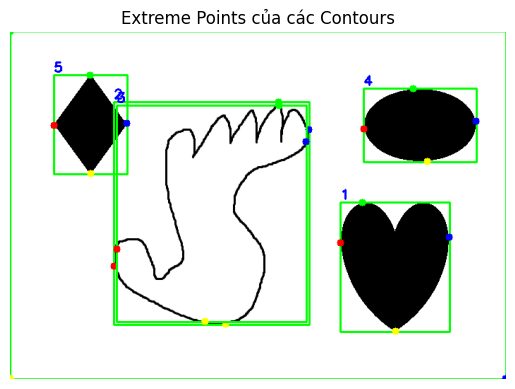

In [24]:
im_draw = im.copy()

# ======================
# Tính và vẽ Extreme Points
# ======================
for i, cnt in enumerate(contours):
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

    # Vẽ bounding box và số thứ tự contour
    x, y, w, h = cv.boundingRect(cnt)
    cv.rectangle(im_draw, (x, y), (x+w, y+h), (0,255,0), 2)
    cv.putText(im_draw, str(i), (x, y-5), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    # Vẽ các điểm extreme
    cv.circle(im_draw, leftmost, 5, (0,0,255), -1)     # trái nhất đỏ
    cv.circle(im_draw, rightmost, 5, (255,0,0), -1)    # phải nhất xanh
    cv.circle(im_draw, topmost, 5, (0,255,0), -1)      # trên cùng xanh lá
    cv.circle(im_draw, bottommost, 5, (0,255,255), -1) # dưới cùng vàng

    # In kết quả
    print(f"Contour {i}:")
    print(f"  Extreme Points: left={leftmost}, right={rightmost}, top={topmost}, bottom={bottommost}")
    print("-"*50)

# Hiển thị ảnh
plt.imshow(cv.cvtColor(im_draw, cv.COLOR_BGR2RGB))
plt.title("Extreme Points của các Contours")
plt.axis("off")
plt.show()

Contour 2:
  Extreme Points: left=(np.int32(147), np.int32(332)), right=(np.int32(423), np.int32(139)), top=(np.int32(380), np.int32(100)), bottom=(np.int32(305), np.int32(414))


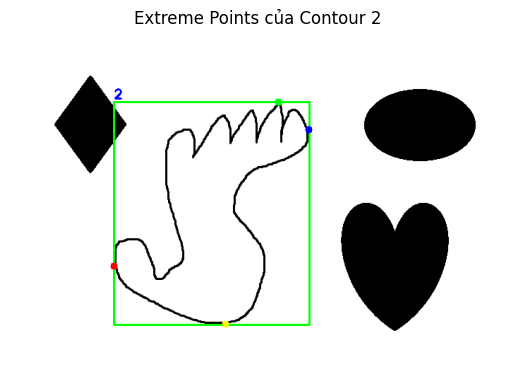

In [25]:
im_draw = im.copy()

# ======================
# Chọn 1 vật thể (contour thứ 0)
# ======================
i = 2  # index contour muốn chạy
cnt = contours[i]

# ----- Tính Extreme Points -----
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

# Vẽ bounding box và số thứ tự
x, y, w, h = cv.boundingRect(cnt)
cv.rectangle(im_draw, (x, y), (x+w, y+h), (0,255,0), 2)
cv.putText(im_draw, str(i), (x, y-5), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

# Vẽ các điểm extreme
cv.circle(im_draw, leftmost, 5, (0,0,255), -1)     # trái nhất đỏ
cv.circle(im_draw, rightmost, 5, (255,0,0), -1)    # phải nhất xanh
cv.circle(im_draw, topmost, 5, (0,255,0), -1)      # trên cùng xanh lá
cv.circle(im_draw, bottommost, 5, (0,255,255), -1) # dưới cùng vàng

# In kết quả
print(f"Contour {i}:")
print(f"  Extreme Points: left={leftmost}, right={rightmost}, top={topmost}, bottom={bottommost}")

# Hiển thị ảnh
plt.imshow(cv.cvtColor(im_draw, cv.COLOR_BGR2RGB))
plt.title(f"Extreme Points của Contour {i}")
plt.axis("off")
plt.show()